In [87]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 27 21:53:34 2015

@author: nymph
"""


#################################### Read the data ############################
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
''' read_csv()
The read_csv() function in pandas package parse an csv data as a DataFrame data structure. What's the endpoint of the data?
The data structure is able to deal with complex table data whose attributes are of all data types. 
Row names, column names in the dataframe can be used to index data.
'''

################################## Enter your code below ######################


" read_csv()\nThe read_csv() function in pandas package parse an csv data as a DataFrame data structure. What's the endpoint of the data?\nThe data structure is able to deal with complex table data whose attributes are of all data types. \nRow names, column names in the dataframe can be used to index data.\n"

In [88]:
data = pd.read_csv('a.csv')
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


In [89]:
data.dtypes

mpg             float64
cylinders       float64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model           float64
origin          float64
car_name         object
dtype: object

# Câu 8

## Preprocessing

In [90]:
data = data.assign(
    comp = lambda x: x.car_name.str.split().str[0]
)
data.model = pd.to_datetime(data.model, format = '%y').dt.year
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,comp
0,18.0,8.0,307.0,130.0,3504.0,12.0,1970,1.0,chevrolet chevelle malibu,chevrolet
1,15.0,8.0,350.0,165.0,3693.0,11.5,1970,1.0,buick skylark 320,buick
2,18.0,8.0,318.0,150.0,3436.0,11.0,1970,1.0,plymouth satellite,plymouth
3,16.0,8.0,304.0,150.0,3433.0,12.0,1970,1.0,amc rebel sst,amc
4,17.0,8.0,302.0,140.0,3449.0,10.5,1970,1.0,ford torino,ford
...,...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,1982,1.0,ford mustang gl,ford
402,44.0,4.0,97.0,52.0,2130.0,24.6,1982,2.0,vw pickup,vw
403,32.0,4.0,135.0,84.0,2295.0,11.6,1982,1.0,dodge rampage,dodge
404,28.0,4.0,120.0,79.0,2625.0,18.6,1982,1.0,ford ranger,ford


In [134]:
# check spelling
data.comp.replace({'chevroelt': 'chevrolet',
                   'maxda':'mazda',
                   'mercedes':'mercedes-benz',
                   'toyouta':'toyota',
                   'vokswagen':'volkswagen',
                    'vw':'volkswagen'
                   }, inplace = True)
# Convert to real company
data.comp.replace({'chevrolet': 'General Motors',
                    'dodge': 'General Motors',
                    'buick': 'General Motors',
                    'plymouth': 'General Motors',
                    'pontiac': 'General Motors',
                    'cadillac': 'General Motors',
                    'oldsmobile': 'General Motors',
                    'chevy': 'General Motors',
                    'chrysler': 'General Motors',
                    'mercury': 'Ford',
                    'ford': 'Ford',
                    'capri': 'Ford',
                    'datsun': 'Nissan',     
                    'nissan': 'Nissan',
                    'citroen': 'Stellantis',
                    'opel': 'Stellantis',
                    'fiat': 'Stellantis',
                    'peugeot': 'Stellantis',
                    'audi': 'Volkswagen',
                    'volkswagen': 'Volkswagen',
                    'toyota': 'Toyota',
                    'volvo': 'Volvo',
                    'mazda': 'Mazda',
                    'subaru': 'Subaru',
                    'honda': 'Honda',
                    'mercedes-benz': 'Daimler',
                    'bmw': 'BMW',
                    'saab': 'Saab',
                    'hi': 'Huyndai',
                    'renault': 'Renault',
                    'amc': 'AMC',
                    'triumph': 'British Leyland'
                    }, inplace = True)

In [135]:
data.comp.unique()

array(['General Motors', 'AMC', 'Ford', 'Stellantis', 'Toyota', 'Nissan',
       'Volkswagen', 'Saab', 'BMW', 'Huyndai', 'Mazda', 'Volvo',
       'Renault', 'Honda', 'Subaru', 'Daimler', 'Triumph'], dtype=object)

In [136]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,comp
0,18.0,8.0,307.0,130.0,3504.0,12.0,1970,1.0,chevrolet chevelle malibu,General Motors
1,15.0,8.0,350.0,165.0,3693.0,11.5,1970,1.0,buick skylark 320,General Motors
2,18.0,8.0,318.0,150.0,3436.0,11.0,1970,1.0,plymouth satellite,General Motors
3,16.0,8.0,304.0,150.0,3433.0,12.0,1970,1.0,amc rebel sst,AMC
4,17.0,8.0,302.0,140.0,3449.0,10.5,1970,1.0,ford torino,Ford
...,...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,1982,1.0,ford mustang gl,Ford
402,44.0,4.0,97.0,52.0,2130.0,24.6,1982,2.0,vw pickup,Volkswagen
403,32.0,4.0,135.0,84.0,2295.0,11.6,1982,1.0,dodge rampage,General Motors
404,28.0,4.0,120.0,79.0,2625.0,18.6,1982,1.0,ford ranger,Ford


## Plotting

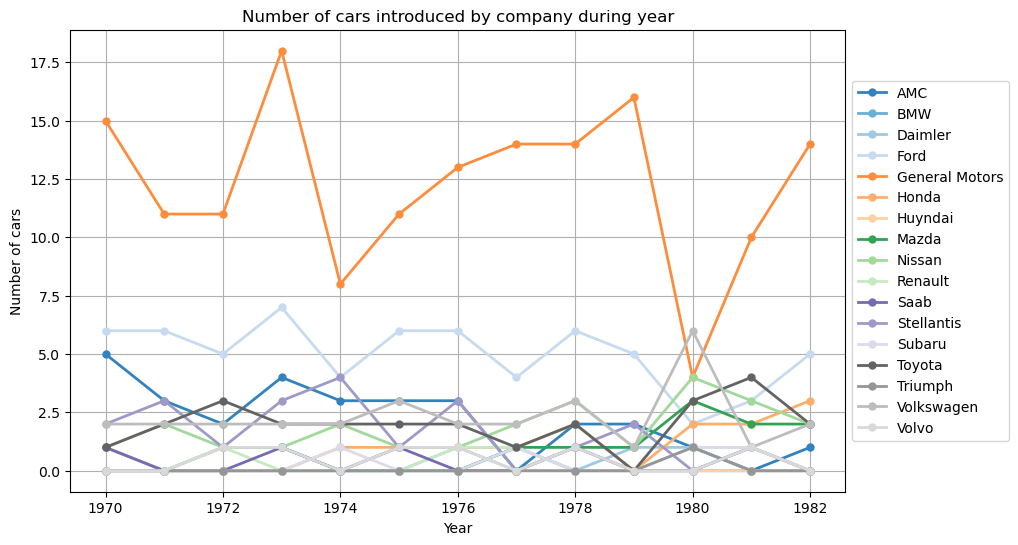

In [137]:
seri = data.groupby(['comp', 'model']).size().reset_index().rename(columns = {0: 'num'})
seri = seri.pivot(index = 'model', columns = 'comp', values = 'num')
seri = seri.fillna(0)
seri.plot(kind = 'line', figsize = (10, 6), title = 'Number of cars introduced by company during year', 
          grid = True, colormap = 'tab20c', marker = 'o', markersize = 5, linewidth = 2);

plt.xlabel('Year'),
plt.ylabel('Number of cars'),
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5));

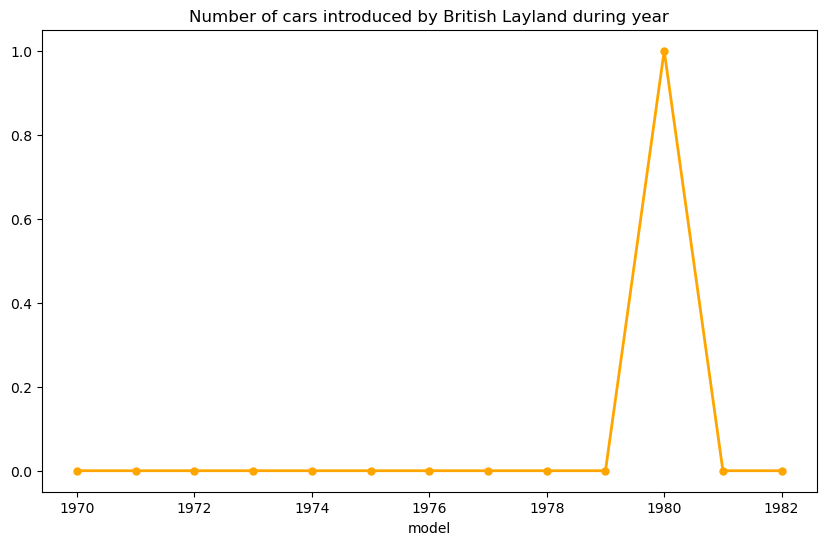

In [139]:
seri['Triumph'].plot(kind = 'line', figsize = (10, 6),
                     title = 'Number of cars introduced by British Layland during year',
                     marker='o', markersize=5, linewidth=2, color = 'orange');

<h4><font color = 'red'>Some Interesting trends</font></h4>
- I took consideration on General Motor trend. When it strongly reduced intensity of the number of cars in 1974 and 1980.
- From 1970-1982, British Layland Cooporation introduced only one car named Triumph.

# Câu 9

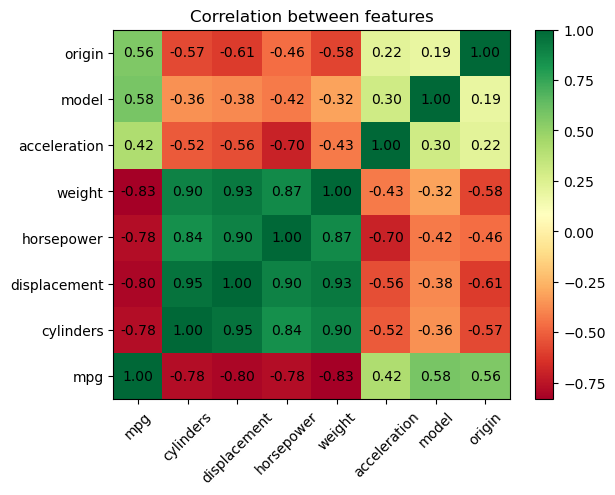

In [81]:
corr = data.iloc[:,0:8].corr()

fig, ax = plt.subplots()
plt.pcolor(corr, cmap = 'RdYlGn', linewidths = 0.2)
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
plt.yticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
plt.xticks(rotation = 45);
plt.colorbar()
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        ax.text(i + 0.5, j + 0.5, '%.2f' % corr.iloc[i,j], ha = 'center', va = 'center')
plt.title('Correlation between features')
plt.show()

<h4><font color = 'red'>Some interesting correlations</font></h4>

- The pair of horsepower and acceleration, when the correlation is $-0.7 < 0$. But what I know that the horsepower and accleration are proportional to each other. So that I think it should be a positive number.